# PROJECT 4.2 HEART DISEASE
## `BEST MODEL SELECTION`

This part is to apply two type of dataset (original + decisiontree and feature engineering + decisiontree) to different model for training. The final chosen model shall be tuned for best accuracy.

## 1. LOAD DATA FROM DATASET

In [29]:
# import warnings
# warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, classification_report

from src.data.data_engineering import data_loader

path = "../dataset/"
X_prp_train, X_prp_val, X_prp_test, y_prp_train, y_prp_val, y_prp_test = data_loader(path, filenames = ("prp_train.csv", "prp_val.csv", "prp_test.csv"))
X_odt_train, X_odt_val, X_odt_test, y_odt_train, y_odt_val, y_odt_test = data_loader(path, filenames=("topK_odt_train.csv", "topK_odt_val.csv", "topK_odt_test.csv"))
X_fe_dt_train, X_fe_dt_val, X_fe_dt_test, y_fe_dt_train, y_fe_dt_val, y_fe_dt_test = data_loader(path, filenames=("topK_fe_dt_train.csv", "topK_fe_dt_val.csv", "topK_fe_dt_test.csv"))

✅ Load data from ('prp_train.csv', 'prp_val.csv', 'prp_test.csv') successfully
✅ Load data from ('topK_odt_train.csv', 'topK_odt_val.csv', 'topK_odt_test.csv') successfully
✅ Load data from ('topK_fe_dt_train.csv', 'topK_fe_dt_val.csv', 'topK_fe_dt_test.csv') successfully


In [44]:
# check & verify randomly the function
print(X_odt_test.shape)
print(y_odt_test.unique()) # Separate by K-Fold

(31, 10)
[1 0 2 3 4]


## 2. SETUP & TRAIN THE RANDOM FOREST FUNCTION

In [13]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:
# Initial parameters at the first time of RF Classifier
parameters = {
        "max_depth": 10,
        "min_samples_split": 2,
        "min_samples_leaf": 1,
        "max_features": "sqrt",
        "oob_score": False,
        "random_state": 42,
    }
# Build the function of find_optimum_parameters
def find_optimum_rf(
        X_train,
        y_train,
        n_estimators = range(50, 550, 50),
        cv_splits = 5,
        para_grid = parameters,
):
    """
    Function to return the best optimum parameters by using StratifiedKFold
    :return: rf model, val_acc, {n_estimators: best_N}
    """
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    scores = []
    print("👉 Optimizing RF model...")

    for n_estimator in n_estimators:
        rf = RandomForestClassifier(n_estimators=n_estimator, **para_grid)
        cv_score = cross_val_score(rf, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
        print(f"Iterator {n_estimator} give score: {cv_score}...")
        scores.append(cv_score.mean())

    plt.figure(figsize=(10, 6))
    plt.plot(list(n_estimators), scores, "bo-")
    plt.title(f"Optimum n_estimators for Random Forest (CV={cv_splits}-fold)")
    plt.xlabel("n_estimators")
    plt.ylabel("Cross-Validation Accuracy")
    plt.grid(True)

    # Find the max value of score then the n_estimator shall be under this max score
    best_N = list(n_estimators)[np.argmax(scores)]
    print(f"✅ Best n_estimators: {best_N}")

    optimum_rf = RandomForestClassifier(n_estimators=best_N, **para_grid)
    optimum_rf.fit(X_train, y_train)

    return optimum_rf, best_N, max(scores)

In [23]:
# function test the optimum model
# _, best_N, max_score = find_optimum_rf(X_odt_train, y_odt_train)
# print(best_N)

Create the function and find the best accuracy of RF for data

In [45]:
def evaluate_val_rf(
        X_train, y_train, X_val, y_val,
        n_estimators=range(50, 1000, 50),
        cv_splits=5,
        para_grid=parameters,
):
    """
    This function is to evaluate the RF model based on the train data & validation data. The dataset is separated into 5 folds for validation
    :return:the model, accuracy, and best n_estimators
    """
    optimum_rf, best_N, acc_score = find_optimum_rf(X_train, y_train,
                                                    n_estimators, cv_splits, para_grid)
    val_pred = optimum_rf.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    print(f"✅ The accuracy score in validation set is {val_acc}")
    print("✅ Classification report:")
    print(classification_report(y_val, val_pred, zero_division=0))  # to prevent class 0

    return optimum_rf, val_acc, {"n_estimators": best_N}

In [41]:
def evaluate_test_rf(
        rf_model, X_test, y_test
):
    """
    This function is to verify the correction of optimum rf with test set.
    :return: the accuracy score
    """
    y_pred = rf_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ The accuracy score in test set is {acc}")
    print("✅ Classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    return acc

## 3. TRAIN & TEST ON DATASET

👉 Optimizing RF model...
Iterator 50 give score: [0.63265306 0.63265306 0.52083333 0.625      0.5625    ]...
Iterator 100 give score: [0.6122449  0.59183673 0.54166667 0.64583333 0.5625    ]...
Iterator 150 give score: [0.57142857 0.59183673 0.5625     0.64583333 0.54166667]...
Iterator 200 give score: [0.59183673 0.6122449  0.5625     0.625      0.5625    ]...
Iterator 250 give score: [0.59183673 0.59183673 0.54166667 0.64583333 0.54166667]...
Iterator 300 give score: [0.6122449  0.59183673 0.54166667 0.64583333 0.54166667]...
Iterator 350 give score: [0.63265306 0.57142857 0.54166667 0.64583333 0.54166667]...
Iterator 400 give score: [0.6122449  0.59183673 0.54166667 0.64583333 0.54166667]...
Iterator 450 give score: [0.59183673 0.59183673 0.54166667 0.64583333 0.54166667]...
Iterator 500 give score: [0.59183673 0.59183673 0.54166667 0.64583333 0.54166667]...
Iterator 550 give score: [0.59183673 0.59183673 0.52083333 0.64583333 0.54166667]...
Iterator 600 give score: [0.59183673 0.59

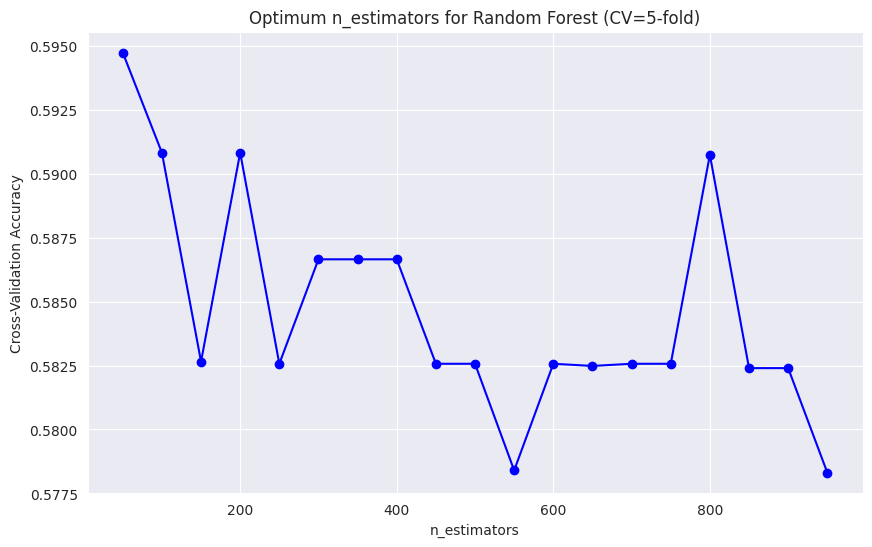

In [46]:
rf_model, acc, best_parameters = evaluate_val_rf(X_odt_train, y_odt_train, X_odt_val, y_odt_val)
test_acc = evaluate_test_rf(rf_model, X_odt_test, y_odt_test)

👉 Optimizing RF model...
Iterator 50 give score: [0.6122449  0.51020408 0.54166667 0.66666667 0.52083333]...
Iterator 100 give score: [0.6122449  0.53061224 0.54166667 0.6875     0.52083333]...
Iterator 150 give score: [0.6122449  0.55102041 0.5625     0.64583333 0.52083333]...
Iterator 200 give score: [0.6122449  0.57142857 0.5625     0.66666667 0.52083333]...
Iterator 250 give score: [0.6122449  0.59183673 0.54166667 0.66666667 0.52083333]...
Iterator 300 give score: [0.6122449  0.59183673 0.54166667 0.6875     0.54166667]...
Iterator 350 give score: [0.6122449  0.6122449  0.54166667 0.6875     0.54166667]...
Iterator 400 give score: [0.6122449  0.6122449  0.54166667 0.64583333 0.54166667]...
Iterator 450 give score: [0.6122449  0.6122449  0.54166667 0.64583333 0.54166667]...
✅ Best n_estimators: 350
✅ The accuracy score in validation set is 0.5666666666666667
✅ Classification report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86  

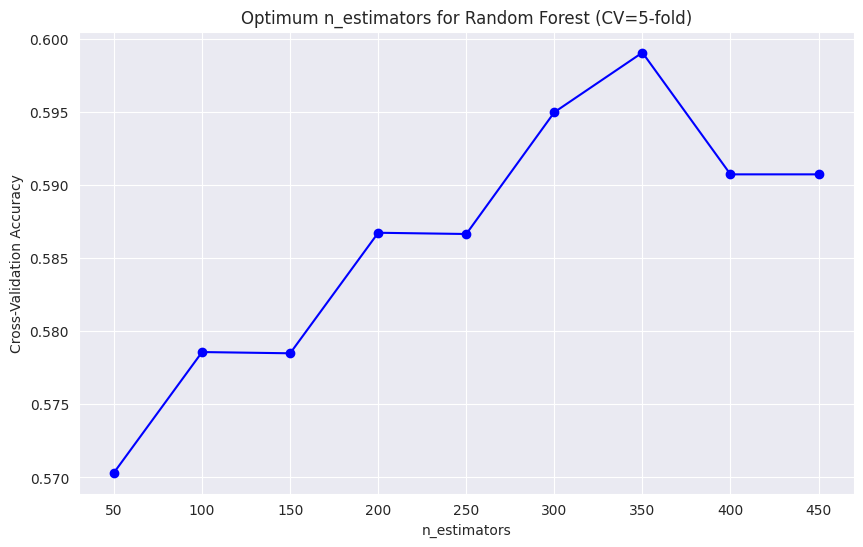

In [38]:
rf_model, acc, best_parameters = evaluate_val_rf(X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val)
test_acc = evaluate_test_rf(rf_model, X_fe_dt_test, y_fe_dt_test)